# Application 4: évaluation d’impact avec regression par discontinuité

Cette application consiste à évaluer l’impact du programme ‘’Head Start’’ sur la mortalité. Les données proviennent de l’article de Jens Ludwig et Douglas Miller ‘’Does Head Start improve children's life chances? Evidence from a regression discontinuity design’’ (The Quarterly journal of economics, 2007). 

Le programme ‘’Head Start’’ vise à améliorer les perspectives de vie des enfants issus de milieux défavorisés en leur fournissant des services éducatifs et sociaux. Le programme Head Start comprend des dépenses publiques dans plusieurs domaines. Environ 40 % du budget du programme est consacré à la scolarisation des jeunes enfants. Les autres services comprennent le programme nutritionnel, les services sociaux, les services de santé mentale et les services de santé. Cet ensemble de services du programme Head Start peut affecter la santé (notre objectif dans ce tutoriel) et la scolarisation (l'autre objectif de l'article de recherche) à travers une variété de canaux. En ce qui concerne la santé, la plupart de ces services ont augmenté les chances que les enfants voient un médecin et ont amélioré la détection précoce et le traitement de certaines maladies.

Depuis 1965, le programme américain "Head Start" offre des services préscolaires, sanitaires et autres services sociaux aux enfants pauvres âgés de trois à cinq ans et à leurs familles. Au moment de la rédaction de l'article de recherche, 900 000 enfants bénéficiaient du programme chaque année. 

Il est difficile d'évaluer si le programme améliore les chances des enfants dans la vie, car la participation est probablement corrélée aux résultats.

Au moment de la mise en œuvre du programme en 1965, seuls les 300 comtés les plus pauvres des États-Unis recevaient une assistance fédérale dans les procédures de demande pour bénéficier du programme. Cette assistance augmente les chances de bénéficier des financements du programme ‘’Head Start’’. Cette discontinuité dans la mise en œuvre a généré un groupe "de traitement" composé de comtés au-dessus du seuil de pauvreté et un groupe "de contrôle" composé de comtés en dessous. 

Le but est d’exploiter cette discontinuité générée par l’assistance fédérale dans les procédures de demande pour estimer l’impact du programme ‘’Head Start’’ sur la mortalité.

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import statsmodels.api as sm

Importation des données

In [332]:
data = pd.read_excel('D:/RDD.xlsx')
data

,oldcode,Assistance,povrate,PovAss,povrate60,age5_9_sum2,age5_9_injury_rate,age25plus_sum2,rate_5964,hsspend_per_kid_68,...,hsspend_per_cap72_a,hsspend_per_cap72_b,hsspend_per_cap72_c,socspend_per_cap72,othspend_per_cap72,totspend_per_cap72,hs72cpos,hs68pos,state,id
0,2024.0,1.0,33.873257,33.873257,93.071671,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,428.562988,1410.370483,1838.933472,0.0,0.0,2.0,1
1,2016.0,1.0,23.260174,23.260174,82.458588,NaN,NaN,NaN,54.824562,0.000000,...,0.000000,0.000000,0.000000,2015.497559,15920.232422,17935.730469,0.0,0.0,2.0,2
2,25028.0,1.0,22.371861,22.371861,81.570274,0.000000,0.000000,76.734192,38.850040,332.997986,...,0.000000,0.000000,0.000000,295.370850,1115.542603,1410.913452,0.0,0.0,25.0,3
3,18066.0,1.0,21.899601,21.899601,81.098015,0.000000,32.032803,118.046906,10.449321,438.329681,...,0.000000,0.000000,0.000000,439.618011,333.193665,772.811646,0.0,1.0,18.0,4
4,44214.0,1.0,21.511631,21.511631,80.710045,0.000000,18.556892,105.361923,7.281200,767.924927,...,19.618231,19.618231,19.618231,496.072754,444.275696,959.966675,1.0,1.0,44.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,2025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,853.676331,6779.185547,7632.861816,0.0,0.0,2.0,3135
3135,47192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.878788,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,47.0,3136
3136,13045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,13.0,3137
3137,50072.0,NaN,NaN,NaN,NaN,1.522441,7.612204,91.876488,9.541530,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,50.0,3138


I.	Première partie : Statistiques descriptives et analyses graphiques 

Q1.Produisez un histogramme pour la variable taux de pauvreté avant la mise en place du programme "Head Start" (en 1960). Que pouvez-vous conclure concernant cette distribution et notre stratégie d'estimation ?

Nous devons disposer d'un nombre suffisant d'observations autour du seuil du taux de pauvreté. S'il y a un saut dans la densité au niveau du seuil, la variable de forçage peut avoir été manipulée, ce qui pourrait invalider l'analyse.


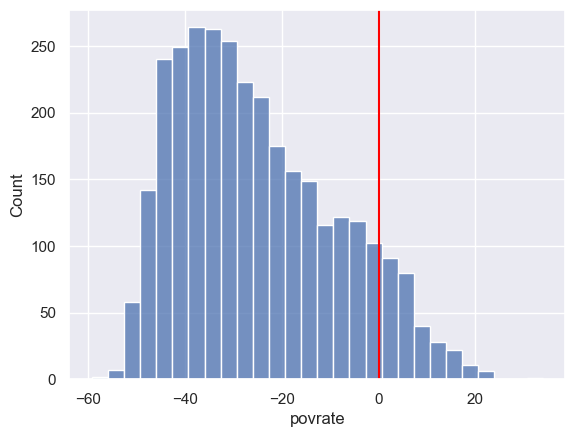

In [333]:
print("Nous devons disposer d'un nombre suffisant d'observations autour du seuil du taux de pauvreté. S'il y a un saut dans la densité au niveau du seuil, la variable de forçage peut avoir été manipulée, ce qui pourrait invalider l'analyse.")
hist=sns.histplot(data=data, x="povrate")
hist.axvline(x = 0, color = "red")
plt.show()

Q2. Comparez les comtés proches du seuil. Pour cela, choisissez arbitrairement de n'utiliser que les comtés dont le taux de pauvreté est situé à au plus 8% en dessous et au-dessus du seuil, soit une largeur de bande dans le taux de pauvreté de 16% autours du seuil. Générez la variable appelée « bande » qui identifient ces comtés se trouvant autours du seuil. 

In [334]:
data['bande']=((data['povrate']>=-8)*(data['povrate']<=8)).map({True:1,False:0})
data.describe()

,oldcode,Assistance,povrate,PovAss,povrate60,age5_9_sum2,age5_9_injury_rate,age25plus_sum2,rate_5964,hsspend_per_kid_68,...,hsspend_per_cap72_b,hsspend_per_cap72_c,socspend_per_cap72,othspend_per_cap72,totspend_per_cap72,hs72cpos,hs68pos,state,id,bande
count,3138.000000,3132.000000,3132.000000,3132.000000,3132.000000,3105.000000,3105.000000,3105.000000,3136.000000,3138.000000,...,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3139.000000,3139.000000
mean,27326.274060,0.095785,-25.001109,0.656677,34.197305,2.178318,20.761323,129.487456,7.003791,104.454001,...,2.020817,2.041409,432.844532,713.059097,1147.945037,0.355322,0.429254,27.277565,1570.000000,0.154189
std,14247.208209,0.294344,16.399483,2.655333,16.399483,5.516542,17.091863,36.333630,16.458255,344.766005,...,6.946722,6.957674,188.813950,1220.008440,1250.848085,0.478687,0.495049,14.241051,906.295574,0.361188
min,1001.000000,0.000000,-59.198414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,16001.250000,0.000000,-38.202812,0.000000,20.995603,0.000000,11.036309,106.130280,0.000000,0.000000,...,0.000000,0.000000,347.008942,278.994659,698.155533,0.000000,0.000000,16.000000,785.500000,0.000000
50%,26091.500000,0.000000,-27.933263,0.000000,31.265151,0.000000,18.009462,125.933594,3.326273,0.000000,...,0.000000,0.000000,409.503616,441.020767,917.744934,0.000000,0.000000,26.000000,1570.000000,0.000000
75%,41041.750000,0.000000,-13.559317,0.000000,45.639097,2.638244,27.084124,149.402390,9.304494,88.702307,...,1.264416,1.307438,485.383949,785.147079,1233.067444,1.000000,1.000000,41.000000,2354.500000,0.000000
max,51024.000000,1.000000,33.873257,33.873257,93.071671,136.054428,215.053757,445.542145,576.441101,8884.182617,...,147.081589,147.081589,5225.813477,35513.746094,35721.238281,1.000000,1.000000,51.000000,3139.000000,1.000000


Q3.	Faites un tableau croisé entre « bande » et «Assistance». Commentez

In [335]:
table = pd.crosstab(data['bande'], data['Assistance'])
print(table)

Assistance   0.0  1.0
bande                
0           2553   95
1            279  205


Q4.	Observez-vous des différences significatives de moyenne pour la variable rate_5964 qui correspond à la variable de résultat qui nous intéresse (la mortalité) avant l’implémentation du ‘’Head Start’’ autours du seuil ? Commentez en quoi le résultat de la comparaison est intéressant.

In [336]:
autour_seuil = data[data['bande']==1]
autour_seuil

,oldcode,Assistance,povrate,PovAss,povrate60,age5_9_sum2,age5_9_injury_rate,age25plus_sum2,rate_5964,hsspend_per_kid_68,...,hsspend_per_cap72_b,hsspend_per_cap72_c,socspend_per_cap72,othspend_per_cap72,totspend_per_cap72,hs72cpos,hs68pos,state,id,bande
95,4048.0,1.0,7.900898,7.900898,67.099312,29.895367,14.947683,148.114120,7.544892,100.312202,...,0.000000,0.000000,411.191803,403.941376,815.133179,0.0,1.0,4.0,96,1
96,11130.0,1.0,7.895260,7.895260,67.093674,0.000000,0.000000,97.859634,52.029137,0.000000,...,0.000000,0.000000,367.930573,152.769806,520.700378,0.0,0.0,11.0,97,1
97,34066.0,1.0,7.844578,7.844578,67.042992,0.000000,20.592020,139.952545,0.000000,0.000000,...,0.000000,0.000000,375.369659,356.568787,731.938416,0.0,0.0,34.0,98,1
98,11131.0,1.0,7.841175,7.841175,67.039589,0.000000,0.000000,160.738007,42.517006,0.000000,...,0.000000,0.000000,631.407349,303.937256,935.344604,0.0,0.0,11.0,99,1
99,25033.0,1.0,7.719479,7.719479,66.917892,0.000000,48.587494,128.529846,0.000000,3714.303955,...,51.948051,51.948051,561.676697,338.768555,952.393311,1.0,1.0,25.0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,11158.0,0.0,-7.807148,0.000000,51.391266,10.182262,10.182262,172.393600,0.000000,0.000000,...,0.000000,0.000000,364.768433,139.725327,504.493774,0.0,0.0,11.0,575,1
575,19015.0,0.0,-7.899075,0.000000,51.299339,4.261122,21.305607,99.110298,5.787037,0.000000,...,0.000000,0.000000,339.542480,293.804138,633.346619,0.0,0.0,19.0,576,1
576,44062.0,0.0,-7.912678,0.000000,51.285736,0.000000,20.817430,185.701019,7.737543,0.000000,...,1.230439,1.230439,449.054138,164.757767,615.042358,1.0,0.0,44.0,577,1
577,10066.0,0.0,-7.940453,0.000000,51.257961,6.389368,38.336208,118.963852,19.190174,0.000000,...,0.000000,0.000000,528.465210,590.319519,1118.784790,0.0,0.0,10.0,578,1


In [337]:
x = autour_seuil['Assistance']
x = sm.add_constant(x)

In [338]:
result = sm.OLS(autour_seuil['rate_5964'],x, missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              rate_5964   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08665
Date:                Wed, 03 Apr 2024   Prob (F-statistic):              0.769
Time:                        01:54:15   Log-Likelihood:                -2020.2
No. Observations:                 484   AIC:                             4044.
Df Residuals:                     482   BIC:                             4053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3228      0.943      9.884      0.0

Q5.	Faite une régression linéaire dont la variable expliquée est la variable de mortalité ‘’age5_9_sum2’’ et les variables explicatives sont ‘’Assistance’’, ‘’povrate’’ et ‘’PovAss’’. Calculez les valeurs prédites que vous stockez dans la variable ‘’Linear’’. Représentez graphiquement ‘’Linear’’ en fonction ‘’povrate’’.  

In [339]:
x = data[['Assistance','povrate','PovAss']]
x = sm.add_constant(x)

In [340]:
result = sm.OLS(data['rate_5964'],x, missing='drop').fit()
print(result.summary())
data['LinearBefore'] = result.predict(x)

                            OLS Regression Results                            
Dep. Variable:              rate_5964   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     10.13
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.23e-06
Time:                        01:54:15   Log-Likelihood:                -13201.
No. Observations:                3132   AIC:                         2.641e+04
Df Residuals:                    3128   BIC:                         2.643e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8540      0.729     12.154      0.0

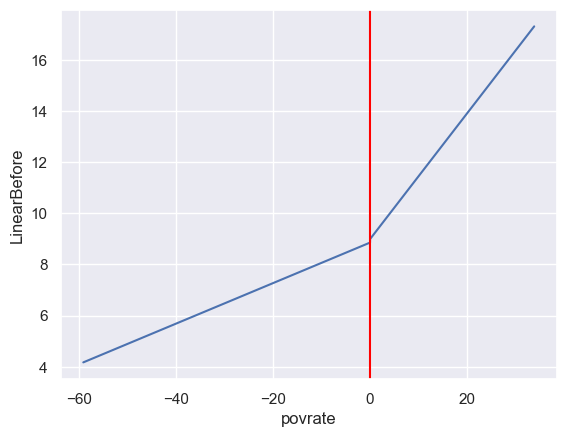

In [341]:
fig = sns.lineplot(data=data, x="povrate", y="LinearBefore")
fig.axvline(x = 0, color = "red")

II.	Deuxième partie : mesure de l’impact

1.	Faite une régression linéaire dont la variable expliquée est la variable de mortalité ‘’age5_9_sum2’’ et les variables explicatives sont ‘’Assistance’’, ‘’povrate’’ et ‘’PovAss’’. Calculez les valeurs prédites que vous stockez dans la variable ‘’Linear’’. Représentez graphiquement ‘’Linear’’ en fonction ‘’povrate’’.   Quel est l’effet du programme ?

In [342]:
result = sm.OLS(data['age5_9_sum2'],x, missing='drop').fit()
print(result.summary())
data['Linear'] = result.predict(x)

                            OLS Regression Results                            
Dep. Variable:            age5_9_sum2   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.502
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           0.000221
Time:                        01:54:17   Log-Likelihood:                -9695.5
No. Observations:                3104   AIC:                         1.940e+04
Df Residuals:                    3100   BIC:                         1.942e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1009      0.246     12.630      0.0

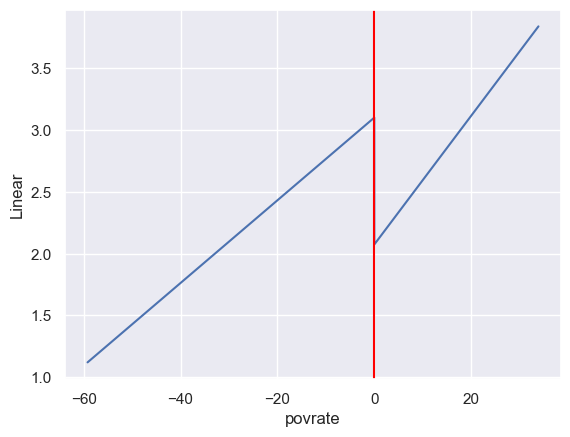

In [343]:
fig = sns.lineplot(data=data, x="povrate", y="Linear")
fig.axvline(x = 0, color = "red")

2.	Reprenez la question 1 en utilisant uniquement les comptés situées à au plus 8% en dessous et au-dessus du seuil, soit une bande de 16% autours du seuil.

                            OLS Regression Results                            
Dep. Variable:            age5_9_sum2   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.729
Date:                Wed, 03 Apr 2024   Prob (F-statistic):              0.160
Time:                        01:54:18   Log-Likelihood:                -1501.7
No. Observations:                 482   AIC:                             3011.
Df Residuals:                     478   BIC:                             3028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4840      0.673      5.174      0.0

C:\Users\Yao Thibaut Kpegli\AppData\Local\Temp\ipykernel_27116\1057883384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autour_seuil['Linear'] = result.predict(x)


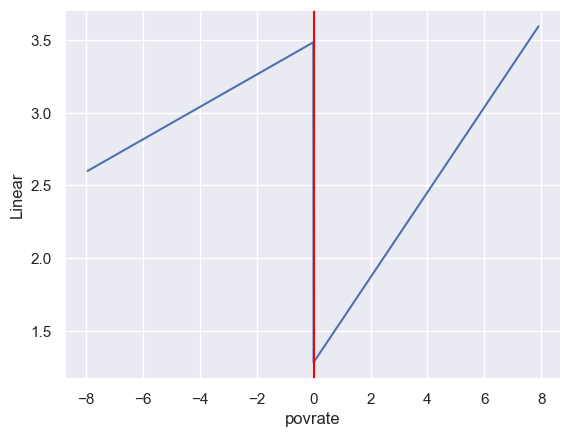

In [344]:
x = autour_seuil[['Assistance','povrate','PovAss']]
x = sm.add_constant(x)

result = sm.OLS(autour_seuil['age5_9_sum2'],x, missing='drop').fit()
print(result.summary())
autour_seuil['Linear'] = result.predict(x)

fig = sns.lineplot(data=autour_seuil, x="povrate", y="Linear")
fig.axvline(x = 0, color = "red")

3.	Reprenez la question 1 en utilisant uniquement les comptés situées à au plus 16% en dessous et au-dessus du seuil, soit une bande de 32% autours du seuil.

                            OLS Regression Results                            
Dep. Variable:            age5_9_sum2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6833
Date:                Wed, 03 Apr 2024   Prob (F-statistic):              0.562
Time:                        01:54:18   Log-Likelihood:                -2797.1
No. Observations:                 858   AIC:                             5602.
Df Residuals:                     854   BIC:                             5621.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1340      0.539      5.814      0.0

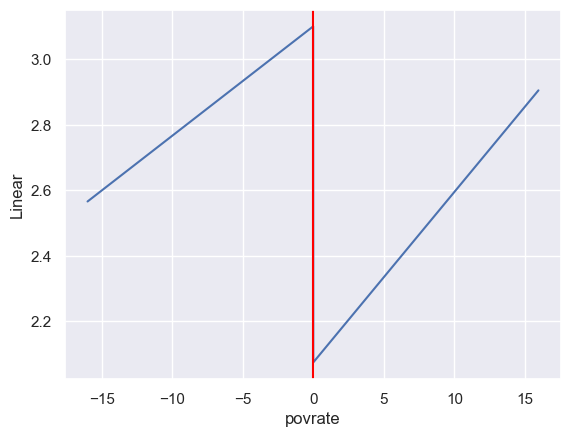

In [345]:
data['bande2']=((data['povrate']>=-16)*(data['povrate']<=16)).map({True:1,False:0})

autour_seuil2 = data[data['bande2']==1]
autour_seuil2.describe()

x = autour_seuil2[['Assistance','povrate','PovAss']]
x = sm.add_constant(x)

result = sm.OLS(autour_seuil2['age5_9_sum2'],x, missing='drop').fit()
print(result.summary())
data['Linear'] = result.predict(x)

fig = sns.lineplot(data=autour_seuil2, x="povrate", y="Linear")
fig.axvline(x = 0, color = "red")


4.	Reprenez la question 1 en ajoutant le carré de ‘’povrate’’ dans les variables explicatives.

                            OLS Regression Results                            
Dep. Variable:            age5_9_sum2   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.994
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           0.000519
Time:                        01:54:51   Log-Likelihood:                -9695.3
No. Observations:                3104   AIC:                         1.940e+04
Df Residuals:                    3099   BIC:                         1.943e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3009      0.380      8.677      0.0

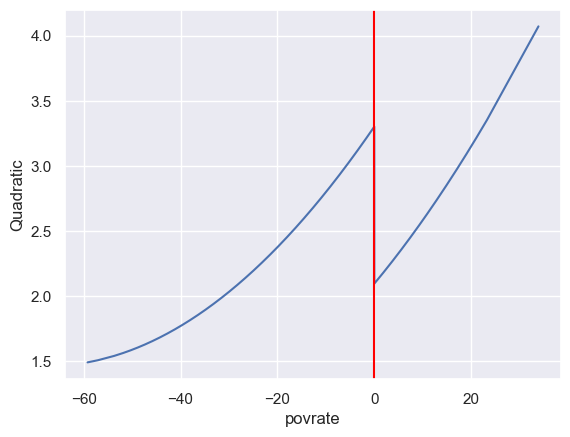

In [347]:
data['povrate2'] = data['povrate']**2


x = data[['Assistance','povrate','PovAss','povrate2']]
x = sm.add_constant(x)

result = sm.OLS(data['age5_9_sum2'],x, missing='drop').fit()
print(result.summary())
data['Quadratic'] = result.predict(x)

fig = sns.lineplot(data=data, x="povrate", y="Quadratic")
fig.axvline(x = 0, color = "red")